# Supplemental Materials

In [1]:
# Add any additional libraries or submodules below

import pkg_resources
if pkg_resources.get_distribution("scikit-learn").version == '0.21.3':
    !pip install --upgrade scikit-learn

# Display plots inline
%matplotlib inline

#install imlearn
! pip install imblearn
!pip install --upgrade tensorflow


# Data libraries
import tensorflow 
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

# ipython interactive widgets
from ipywidgets import interact


# sklearn modules
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score



Requirement already up-to-date: tensorflow in /opt/conda/lib/python3.7/site-packages (2.1.0)


In [2]:
wine_train = pd.read_csv("wine_qual_train.csv")
wine_test  = pd.read_csv("wine_qual_test.csv")

In [3]:
def categoryF(data): #categorize the quality score into 4 different  category quality
    dict = {0:'Poor',1:'Poor',2:'Poor',3:'Poor',4:'Poor',5:'Average',6:'Good',7:'Excellent',8:'Excellent',9:'Excellent',10:'Excellent'}
    #category quality#
    add=[dict[data['quality'][i]] for i in range(len(data))]
    data.insert(1,'quality_class',add)
    #use binary value replace wine 'white' to 0 and 'red' to 1 so we can show this feature on pairplot
    data['wine'].loc[data['wine'] == 'red'] = 1
    data['wine'].loc[data['wine'] == 'white'] = 0

categoryF(wine_train)
categoryF(wine_test)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [4]:
feature_names = ['wine', 'fixed_acidity', 'volatile_acidity', 'citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','p_h','sulphates','alcohol']
X_train = wine_train[feature_names]
y_train = wine_train['quality_class']
X_test=wine_test[feature_names]
y_test=wine_test['quality_class']

In [5]:
#guocaiyang
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_sample(X_train, y_train)

In [ ]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)
X_train, y_train = cc.fit_resample(X_train, y_train)

In [ ]:
from imblearn.under_sampling import CondensedNearestNeighbour
cnn = CondensedNearestNeighbour(random_state=0)
X_train, y_train = cnn.fit_sample(X_train, y_train)

In [6]:
S = StandardScaler().fit(X_train.append(X_test))
X_train = S.transform(X_train)
X_test = S.transform(X_test)

In [ ]:

new_wine=pd.concat([X_train,y_train], axis=1) 
#sns.pairplot(new_wine.drop('quality_class', axis=1),'quality_class')

In [ ]:
sns.pairplot(new_wine,hue='quality_class')

## SVM

In [ ]:
svm = SVC(kernel='rbf',C=10)
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))
y_predict = svm.predict(X_test)
print(sklearn.metrics.classification_report(y_test, y_predict))

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_params = {"C":np.logspace(-2,3,6)}
svm = SVC(kernel='rbf')
grid = GridSearchCV(svm,grid_params,cv = 10)
grid.fit(X_train,y_train)
print(grid.best_params_,grid.best_score_)

## KNN

In [7]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))
y_predict = knn.predict(X_test)
print(sklearn.metrics.classification_report(y_test, y_predict))

Accuracy of K-NN classifier on training set: 0.81
Accuracy of K-NN classifier on test set: 0.53
              precision    recall  f1-score   support

     Average       0.57      0.66      0.61       325
   Excellent       0.47      0.66      0.55       202
        Good       0.60      0.39      0.47       429
        Poor       0.19      0.27      0.22        44

    accuracy                           0.53      1000
   macro avg       0.46      0.49      0.46      1000
weighted avg       0.55      0.53      0.52      1000



In [8]:
from sklearn.model_selection import GridSearchCV
grid_params = {"n_neighbors":np.arange(1,21,1)}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn,grid_params,cv = 10)
grid.fit(X_train,y_train)
print(grid.best_params_,grid.best_score_)

{'n_neighbors': 1} 0.8307003556972893


In [9]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))
y_predict = knn.predict(X_test)
print(sklearn.metrics.classification_report(y_test, y_predict))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.61
              precision    recall  f1-score   support

     Average       0.61      0.66      0.64       325
   Excellent       0.64      0.56      0.60       202
        Good       0.62      0.64      0.63       429
        Poor       0.43      0.20      0.28        44

    accuracy                           0.61      1000
   macro avg       0.57      0.52      0.53      1000
weighted avg       0.61      0.61      0.61      1000



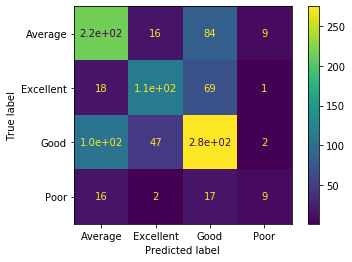

In [10]:
sklearn.metrics.plot_confusion_matrix(knn, X_test, y_test, include_values=True, normalize=None)

In [ ]:
np.logspace(-2,3,6)